<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [3]:
df = pd.read_excel(path)
df.head(15)

,Customer ID,Age,Gender,Total Spent,Converted,Comments
0,1,23,F,150,1,Satisfied with the service
1,2,35,M,600,1,Needs improvement in delivery
2,3,45,F,800,0,Regular customer
3,4,52,M,200,0,Occasional buyer
4,5,29,F,300,1,High spender
5,6,41,M,450,0,Average experience
6,7,38,F,670,1,Prefers online shopping
7,8,27,M,120,1,New customer
8,9,50,F,500,0,Loyal to the brand
9,10,33,M,750,1,High conversion rate


In [4]:
filtered_df = df[(df['Age'] > 30) & (df['Total Spent'] > 500)]
print(filtered_df)

    Customer ID  Age Gender  Total Spent  Converted  \
1             2   35      M          600          1   
2             3   45      F          800          0   
6             7   38      F          670          1   
9            10   33      M          750          1   
10           11   40      F          610          1   
14           15   36      F          510          1   

                         Comments  
1   Needs improvement in delivery  
2                Regular customer  
6         Prefers online shopping  
9            High conversion rate  
10                 Low engagement  
14               Enjoys discounts  


In [5]:
avg_spent_per_gender = df.groupby('Gender')['Total Spent'].mean()
print(avg_spent_per_gender)

Gender
F    492.5
M    390.0
Name: Total Spent, dtype: float64


In [6]:
conversion_by_gender = df[df['Converted'] == 1].groupby('Gender').size()
print(conversion_by_gender)

Gender
F    6
M    3
dtype: int64


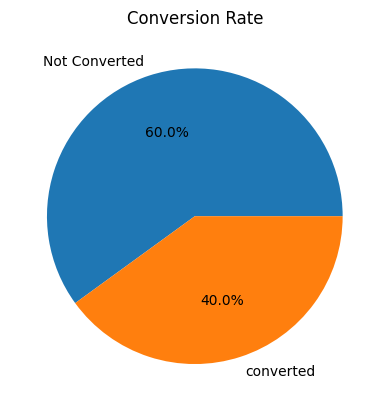

In [7]:
conversion_counts = df['Converted'].value_counts()
conversion_counts.plot.pie(autopct='%1.1f%%', labels=['Not Converted', 'converted'])
plt.title('Conversion Rate')
plt.ylabel('')
plt.show()

In [8]:
top_spenders = df.sort_values(by='Total Spent', ascending=False).head(5)
print(top_spenders[['Customer ID', 'Total Spent']])

    Customer ID  Total Spent
2             3          800
9            10          750
6             7          670
10           11          610
1             2          600


In [10]:
total_revenue = df['Total Spent'].sum()
conversion_rate = df['Converted'].mean() * 100
print(f"Total Revenue: ${total_revenue}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total Revenue: $6670
Conversion Rate: 60.00%


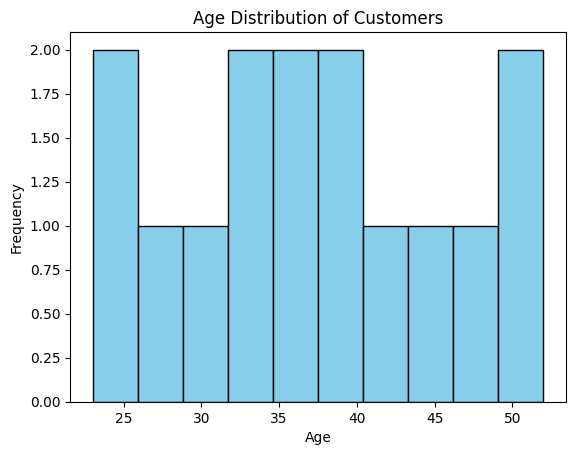

In [12]:
df['Age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Total Spent'] < (Q1 - 1.5 * IQR)) | (df['Total Spent'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Total Spent, Converted, Comments]
Index: []


In [15]:
def categorize_spending(spent):
    if spent < 200:
      return 'Low'
    elif spent < 500:
      return 'Medium'
    else:
      return 'Hight'

df['spending Category'] = df['Total Spent'].apply(categorize_spending)
print(df[['Customer ID', 'Total Spent', 'Spending Category']])

KeyError: "['Spending Category'] not in index"